In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Feautre Engineering

In [7]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data_train = data_train.drop('PassengerId',axis=1)
data_train = data_train.drop('Name',axis=1)
data_train = data_train.drop('Ticket',axis=1)
data_train = data_train.drop('Cabin',axis =1)

In [9]:
data_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
data_test = data_test.drop('PassengerId',axis=1)
data_test = data_test.drop('Name',axis=1)
data_test = data_test.drop('Ticket',axis=1)
data_test = data_test.drop('Cabin',axis =1)

In [11]:
data_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
data_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [13]:
data_train['Age'].mean()

29.69911764705882

In [14]:
data_train['Age'].fillna(30,inplace = True) # imputing the missing values by the round of mean 

In [15]:
data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [17]:
data_train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [18]:
data_train['Embarked'].fillna('S',inplace=True) # imputing missing values by the largest number that is S

In [19]:
data_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Understanding the relationship of target and input variables

In [21]:
data_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
data_train.values[0]

array([0, 3, 'male', 22.0, 1, 0, 7.25, 'S'], dtype=object)

In [23]:
data_train.groupby('Pclass').Survived.sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [24]:
backup=data_train.copy()
backup.columns[1:5]

Index(['Pclass', 'Sex', 'Age', 'SibSp'], dtype='object')

In [25]:
data_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [26]:
data_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
data_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

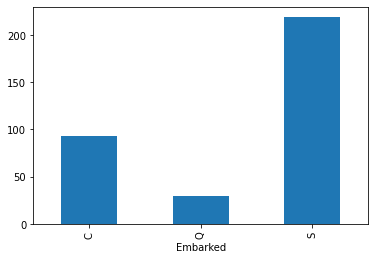

In [28]:
#Group by is used for a categorical and an integer value
data_train.groupby('Embarked').Survived.sum().plot(kind='bar')

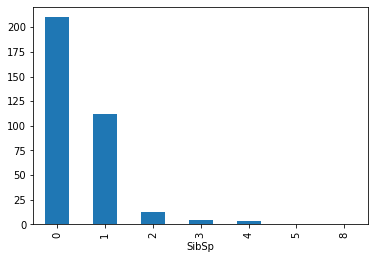

In [29]:
data_train.groupby('SibSp').Survived.sum().plot(kind='bar')

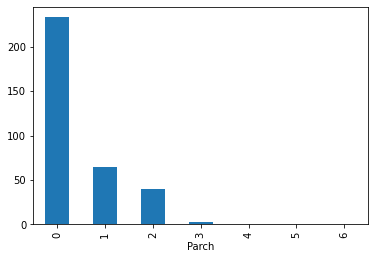

In [30]:
data_train.groupby('Parch').Survived.sum().plot(kind='bar')

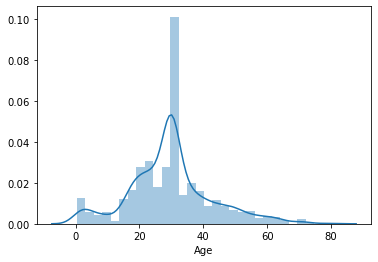

In [31]:
sns.distplot(data_train.Age)

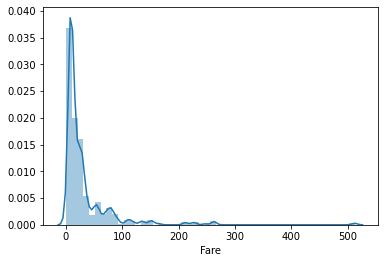

In [32]:
sns.distplot(data_train.Fare)

In [33]:
data_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [34]:
pd.crosstab(data_train.SibSp,data_train.Parch)

Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,537,38,29,1,1,2,0
1,123,57,19,3,3,3,1
2,16,7,4,1,0,0,0
3,2,7,7,0,0,0,0
4,0,9,9,0,0,0,0
5,0,0,5,0,0,0,0
8,0,0,7,0,0,0,0


In [35]:
data_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [36]:
data_train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,30.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [37]:
data_train.describe(include=object)

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


# Feautre Engineering in Test data 

In [38]:
data_test.Age.fillna(30,inplace = True)

In [39]:
data_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [40]:
data_test.Fare.mean()

35.6271884892086

In [41]:
data_test.Fare.fillna(data_test.Fare.mean(),inplace = True)

In [42]:
data_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Scaling

In [43]:
le = preprocessing.LabelEncoder()
data_train.Sex = le.fit_transform(data_train.Sex)
data_train.Embarked = le.fit_transform(data_train.Embarked)

In [44]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,30.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [45]:
data_test.Sex = le.fit_transform(data_test.Sex)
data_test.Embarked = le.fit_transform(data_test.Embarked)
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,30.0,0,0,8.0500,2


## Normalisation 

In [46]:
scaler = preprocessing.MinMaxScaler()
train_Normal_vales = scaler.fit_transform(data_train)
test_Normal_vales = scaler.fit_transform(data_test)

In [47]:
test_Normal_vales

array([[1.        , 1.        , 0.4527232 , ..., 0.        , 0.01528158,
        0.5       ],
       [1.        , 0.        , 0.61756561, ..., 0.        , 0.01366309,
        1.        ],
       [0.5       , 1.        , 0.8153765 , ..., 0.        , 0.01890874,
        0.5       ],
       ...,
       [1.        , 1.        , 0.50547277, ..., 0.        , 0.01415106,
        1.        ],
       [1.        , 1.        , 0.39337993, ..., 0.        , 0.01571255,
        1.        ],
       [1.        , 1.        , 0.39337993, ..., 0.11111111, 0.0436405 ,
        0.        ]])

In [48]:
train_Normal_vales

array([[0.        , 1.        , 1.        , ..., 0.        , 0.01415106,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.13913574,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 0.01546857,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.04577135,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.0585561 ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.01512699,
        0.5       ]])

In [49]:
df_train = pd.DataFrame(train_Normal_vales, columns = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
df_test = pd.DataFrame(test_Normal_vales, columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.5
1,1.0,0.0,0.617566,0.125,0.000000,0.013663,1.0
2,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.5
3,1.0,1.0,0.353818,0.000,0.000000,0.016908,1.0
4,1.0,0.0,0.287881,0.125,0.111111,0.023984,1.0
...,...,...,...,...,...,...,...
413,1.0,1.0,0.393380,0.000,0.000000,0.015713,1.0
414,0.0,0.0,0.512066,0.000,0.000000,0.212559,0.0
415,1.0,1.0,0.505473,0.000,0.000000,0.014151,1.0
416,1.0,1.0,0.393380,0.000,0.000000,0.015713,1.0


In [50]:
df_train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0
5,0.0,1.0,1.0,0.371701,0.000,0.000000,0.016510,0.5
6,0.0,0.0,1.0,0.673285,0.000,0.000000,0.101229,1.0
7,0.0,1.0,1.0,0.019854,0.375,0.166667,0.041136,1.0
8,1.0,1.0,0.0,0.334004,0.000,0.333333,0.021731,1.0
9,1.0,0.5,0.0,0.170646,0.125,0.000000,0.058694,0.0


# Model Building

In [51]:
y_train = df_train.iloc[:,0]

In [52]:
y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [53]:
x_train = df_train.iloc[:,1:]

In [54]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0
...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0
888,1.0,0.0,0.371701,0.125,0.333333,0.045771,1.0
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logistic = LogisticRegression()
model1 = logistic.fit(x_train,y_train)

# Predictions 

In [57]:
predicted_values=model1.predict(df_test)

In [58]:
Actual_test = gender.iloc[:,1]

# Model Evaluation 

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,roc_curve,recall_score,auc,RocCurveDisplay

In [60]:
Confusion_matrix = confusion_matrix(Actual_test,predicted_values)
Confusion_matrix

array([[254,  12],
       [  7, 145]], dtype=int64)

In [61]:
print(f'Accuracy Score',[accuracy_score(Actual_test,predicted_values)*100])
print(f'Precision Score',[precision_score(Actual_test,predicted_values)*100])
print(f'F1 Score',[f1_score(Actual_test,predicted_values)*100])
print(f'Recall Score',[recall_score(Actual_test,predicted_values)*100])

Accuracy Score [95.45454545454545]
Precision Score [92.35668789808918]
F1 Score [93.85113268608414]
Recall Score [95.39473684210526]


In [62]:
fpr,tpr,thresholds=roc_curve(Actual_test,predicted_values)

In [63]:
fpr

array([0.        , 0.04511278, 1.        ])

In [64]:
tpr

array([0.        , 0.95394737, 1.        ])

In [65]:
thresholds

array([2., 1., 0.])

In [66]:
roc_auc = auc(fpr,tpr)
roc_auc

0.9544172932330828

In [67]:
display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)

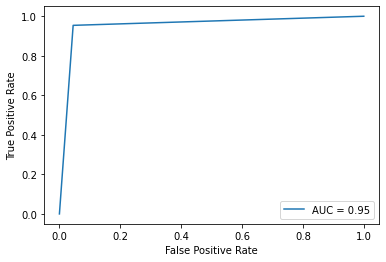

In [68]:
display.plot()

In [71]:
pd.DataFrame(predicted_values, columns = Survived)

NameError: name 'Survived' is not defined

In [70]:
predicted_values

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [75]:
passenger_id=gender.iloc[:,0]

In [82]:
output = pd.DataFrame(passenger_id)

In [83]:
output

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [91]:
Confirmed_output=pd.concat([output,predicted_values],axis=1)

In [92]:
Confirmed_output

,PassengerId,0
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [99]:
Confirmed_output.to_csv('Predictions_kaggle.csv')